In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [5]:
(train_image, train_label), (test_image, test_label) = mnist.load_data()

In [6]:
train_image = train_image / 255.0
test_image = test_image / 255.0

In [7]:
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [8]:
model = models.Sequential(
    [
        layers.Flatten(input_shape=(28, 28)),  # Convert the 28x28 Image into a 1D Array
        layers.Dense(128, activation="relu"),  # Hidden Layer with 128 Units
        layers.Dropout(0.2),
        layers.Dense(10, activation="softmax"),  # Output Layer with 10 units
    ]
)

In [9]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(train_image, train_label, epochs=5)

Epoch 1/5


2023-12-19 09:44:55.786964: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 2s 736us/step - loss: 0.2997 - accuracy: 0.9129
Epoch 2/5
1875/1875 [==============================] - 2s 889us/step - loss: 0.1429 - accuracy: 0.9580
Epoch 3/5
1875/1875 [==============================] - 2s 831us/step - loss: 0.1068 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 2s 931us/step - loss: 0.0865 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 2s 830us/step - loss: 0.0753 - accuracy: 0.9759


In [10]:
test_loss, test_acc = model.evaluate(test_image, test_label)
print(f"Test Accuracy: {test_acc}")
predictions = model.predict(test_image)

313/313 [==============================] - 0s 472us/step - loss: 0.0781 - accuracy: 0.9770
Test Accuracy: [0.07811383157968521, 0.9769999980926514]
313/313 [==============================] - 0s 396us/step


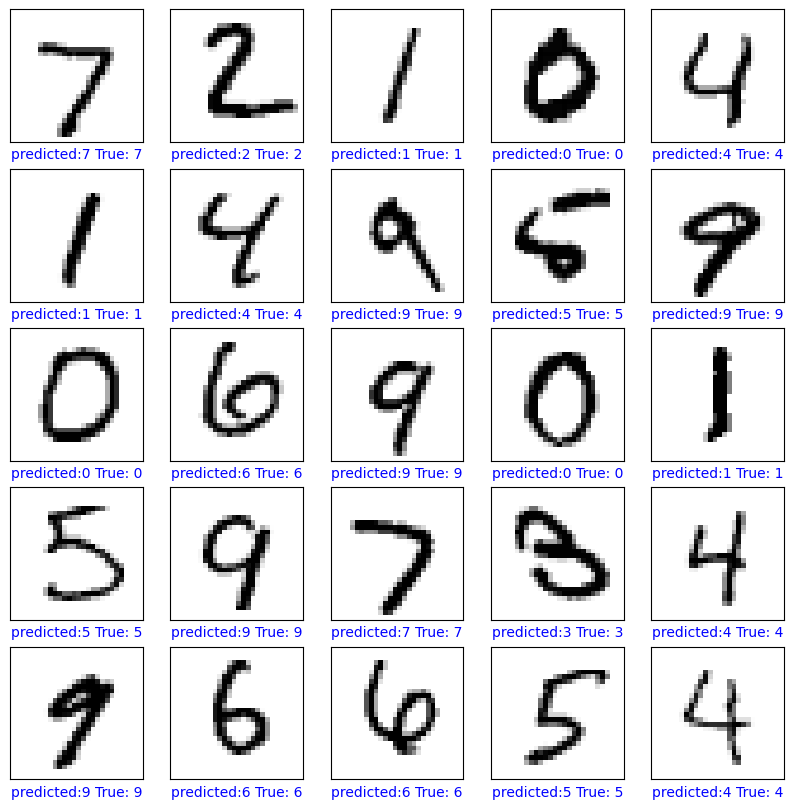

In [17]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_image[i], cmap=plt.cm.binary)
    predicted_label = predictions[i].argmax()
    true_label = test_label[i].argmax()
    color = "blue" if predicted_label == true_label else "red"
    plt.xlabel(f"predicted:{predicted_label} True: {true_label}", color=color)
plt.show()